In [3]:
!git clone https://github.com/magicleap/SuperGluePretrainedNetwork.git
%cd SuperGluePretrainedNetwork



Cloning into 'SuperGluePretrainedNetwork'...
remote: Enumerating objects: 185, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 185 (delta 0), reused 0 (delta 0), pack-reused 184 (from 2)
Receiving objects: 100% (185/185), 118.85 MiB | 40.80 MiB/s, done.
Resolving deltas: 100% (52/52), done.
/content/SuperGluePretrainedNetwork


In [4]:
from google.colab import files
uploaded = files.upload()


Saving scene0711_00_frame-001680.jpg to scene0711_00_frame-001680.jpg
Saving scene0711_00_frame-001995.jpg to scene0711_00_frame-001995.jpg


Loaded SuperPoint model
Loaded SuperGlue model ("indoor" weights)


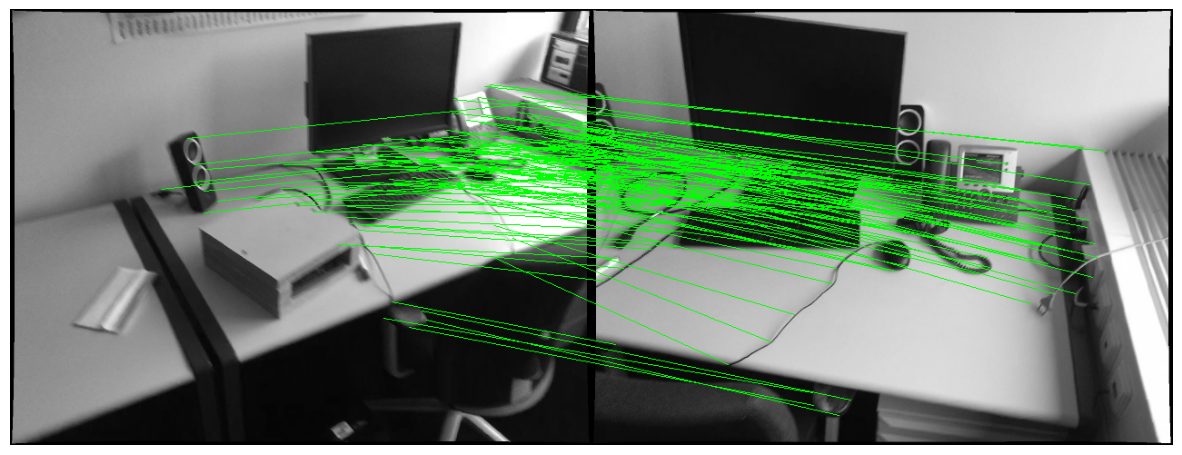

In [5]:
import matplotlib.pyplot as plt
from models.matching import Matching
import torch
import cv2
import numpy as np
from pathlib import Path

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# SuperPoint + SuperGlue config
config = {
    'superpoint': {
        'nms_radius': 4,
        'keypoint_threshold': 0.005,
        'max_keypoints': 1024,
    },
    'superglue': {
        'weights': 'indoor',  # or 'outdoor'
    }
}
matching = Matching(config).eval().to(device)

def load_image(path):
    img = cv2.imread(str(path), cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(f'Image at {path} not found.')
    img = cv2.resize(img, (640, 480))
    return img

# Load uploaded images
img0 = load_image('scene0711_00_frame-001680.jpg')
img1 = load_image('scene0711_00_frame-001995.jpg')

# Prepare for matching
def preprocess(img):
    img = torch.from_numpy(img / 255.).float()[None, None].to(device)
    return {'image': img}

data = {**preprocess(img0), **{k+'0': v for k, v in preprocess(img0).items()},
        **{k+'1': v for k, v in preprocess(img1).items()}}

# Run SuperPoint + SuperGlue
with torch.no_grad():
    pred = matching(data)

# Extract results
kpts0 = pred['keypoints0'][0].cpu().numpy()
kpts1 = pred['keypoints1'][0].cpu().numpy()
matches = pred['matches0'][0].cpu().numpy()

valid = matches > -1
mkpts0 = kpts0[valid]
mkpts1 = kpts1[matches[valid]]

# Draw and visualize matches
def plot_matches(img0, img1, kpts0, kpts1):
    h, w = img0.shape
    out = cv2.hconcat([img0, img1])
    out = cv2.cvtColor(out, cv2.COLOR_GRAY2BGR)
    for pt1, pt2 in zip(kpts0, kpts1):
        pt1 = tuple(np.round(pt1).astype(int))
        pt2 = tuple(np.round(pt2).astype(int) + np.array([w, 0]))
        cv2.line(out, pt1, pt2, (0, 255, 0), 1)
    return out

out_img = plot_matches(img0, img1, mkpts0, mkpts1)
plt.figure(figsize=(15, 6))
plt.imshow(out_img[..., ::-1])
plt.axis('off')
plt.show()


In [6]:
from google.colab import files
uploaded = files.upload()


Saving scene0755_00_frame-000120.jpg to scene0755_00_frame-000120.jpg
Saving scene0755_00_frame-002055.jpg to scene0755_00_frame-002055.jpg


Loaded SuperPoint model
Loaded SuperGlue model ("indoor" weights)


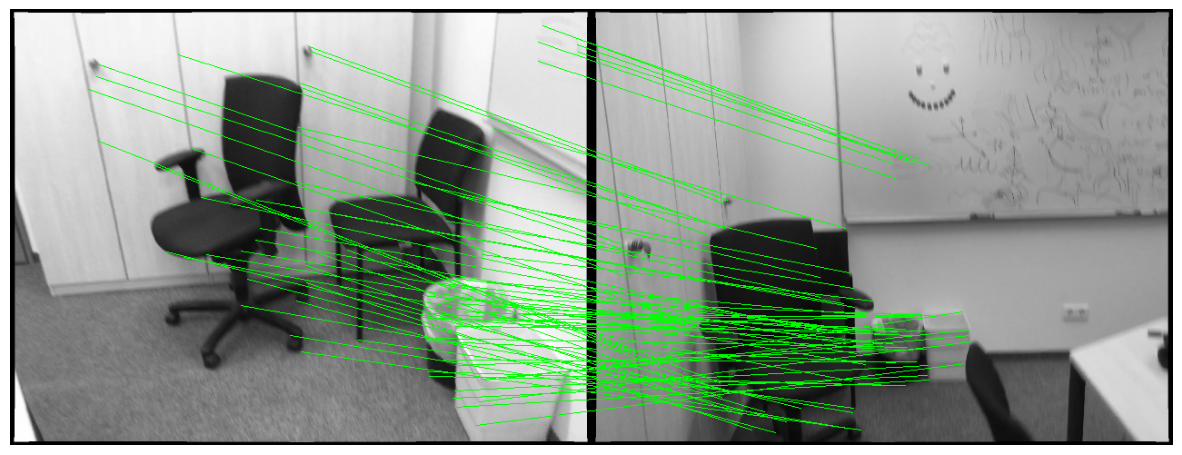

In [7]:
import matplotlib.pyplot as plt
from models.matching import Matching
import torch
import cv2
import numpy as np
from pathlib import Path

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# SuperPoint + SuperGlue config
config = {
    'superpoint': {
        'nms_radius': 4,
        'keypoint_threshold': 0.005,
        'max_keypoints': 1024,
    },
    'superglue': {
        'weights': 'indoor',  # or 'outdoor'
    }
}
matching = Matching(config).eval().to(device)

def load_image(path):
    img = cv2.imread(str(path), cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(f'Image at {path} not found.')
    img = cv2.resize(img, (640, 480))
    return img

# Load uploaded images
img0 = load_image('scene0755_00_frame-000120.jpg')
img1 = load_image('scene0755_00_frame-002055.jpg')

# Prepare for matching
def preprocess(img):
    img = torch.from_numpy(img / 255.).float()[None, None].to(device)
    return {'image': img}

data = {**preprocess(img0), **{k+'0': v for k, v in preprocess(img0).items()},
        **{k+'1': v for k, v in preprocess(img1).items()}}

# Run SuperPoint + SuperGlue
with torch.no_grad():
    pred = matching(data)

# Extract results
kpts0 = pred['keypoints0'][0].cpu().numpy()
kpts1 = pred['keypoints1'][0].cpu().numpy()
matches = pred['matches0'][0].cpu().numpy()

valid = matches > -1
mkpts0 = kpts0[valid]
mkpts1 = kpts1[matches[valid]]

# Draw and visualize matches
def plot_matches(img0, img1, kpts0, kpts1):
    h, w = img0.shape
    out = cv2.hconcat([img0, img1])
    out = cv2.cvtColor(out, cv2.COLOR_GRAY2BGR)
    for pt1, pt2 in zip(kpts0, kpts1):
        pt1 = tuple(np.round(pt1).astype(int))
        pt2 = tuple(np.round(pt2).astype(int) + np.array([w, 0]))
        cv2.line(out, pt1, pt2, (0, 255, 0), 1)
    return out

out_img = plot_matches(img0, img1, mkpts0, mkpts1)
plt.figure(figsize=(15, 6))
plt.imshow(out_img[..., ::-1])
plt.axis('off')
plt.show()


In [8]:
from google.colab import files
uploaded = files.upload()


Saving london_bridge_19481797_2295892421.jpg to london_bridge_19481797_2295892421.jpg
Saving london_bridge_78916675_4568141288.jpg to london_bridge_78916675_4568141288.jpg


Loaded SuperPoint model
Loaded SuperGlue model ("outdoor" weights)


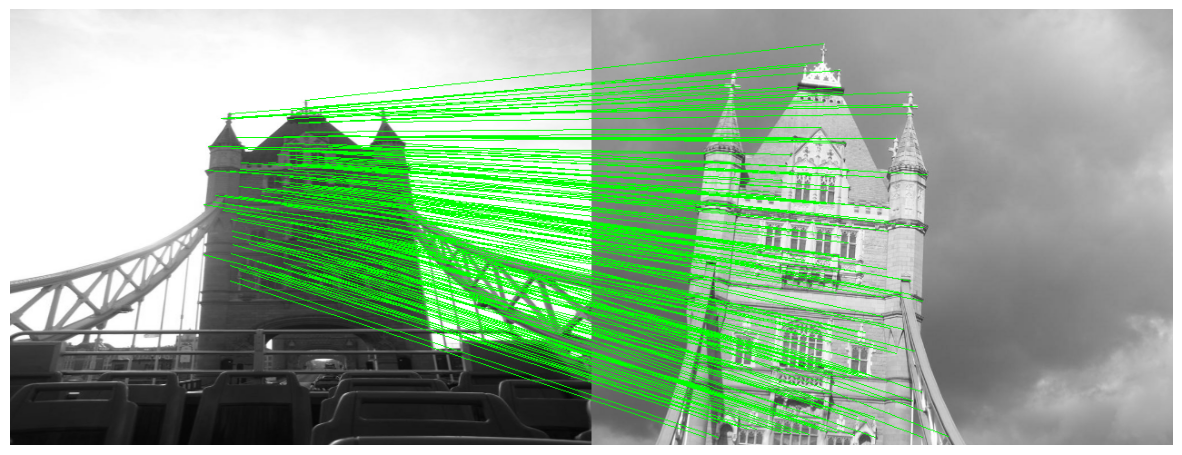

In [9]:
import matplotlib.pyplot as plt
from models.matching import Matching
import torch
import cv2
import numpy as np
from pathlib import Path

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# SuperPoint + SuperGlue config
config = {
    'superpoint': {
        'nms_radius': 4,
        'keypoint_threshold': 0.005,
        'max_keypoints': 1024,
    },
    'superglue': {
        'weights': 'outdoor',  # or 'outdoor'
    }
}
matching = Matching(config).eval().to(device)

def load_image(path):
    img = cv2.imread(str(path), cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(f'Image at {path} not found.')
    img = cv2.resize(img, (640, 480))
    return img

# Load uploaded images
img0 = load_image('london_bridge_19481797_2295892421.jpg')
img1 = load_image('london_bridge_78916675_4568141288.jpg')

# Prepare for matching
def preprocess(img):
    img = torch.from_numpy(img / 255.).float()[None, None].to(device)
    return {'image': img}

data = {**preprocess(img0), **{k+'0': v for k, v in preprocess(img0).items()},
        **{k+'1': v for k, v in preprocess(img1).items()}}

# Run SuperPoint + SuperGlue
with torch.no_grad():
    pred = matching(data)

# Extract results
kpts0 = pred['keypoints0'][0].cpu().numpy()
kpts1 = pred['keypoints1'][0].cpu().numpy()
matches = pred['matches0'][0].cpu().numpy()

valid = matches > -1
mkpts0 = kpts0[valid]
mkpts1 = kpts1[matches[valid]]

# Draw and visualize matches
def plot_matches(img0, img1, kpts0, kpts1):
    h, w = img0.shape
    out = cv2.hconcat([img0, img1])
    out = cv2.cvtColor(out, cv2.COLOR_GRAY2BGR)
    for pt1, pt2 in zip(kpts0, kpts1):
        pt1 = tuple(np.round(pt1).astype(int))
        pt2 = tuple(np.round(pt2).astype(int) + np.array([w, 0]))
        cv2.line(out, pt1, pt2, (0, 255, 0), 1)
    return out

out_img = plot_matches(img0, img1, mkpts0, mkpts1)
plt.figure(figsize=(15, 6))
plt.imshow(out_img[..., ::-1])
plt.axis('off')
plt.show()


In [10]:
from google.colab import files
uploaded = files.upload()

Saving st_pauls_cathedral_30776973_2635313996.jpg to st_pauls_cathedral_30776973_2635313996.jpg
Saving st_pauls_cathedral_37347628_10902811376.jpg to st_pauls_cathedral_37347628_10902811376.jpg


Loaded SuperPoint model
Loaded SuperGlue model ("outdoor" weights)


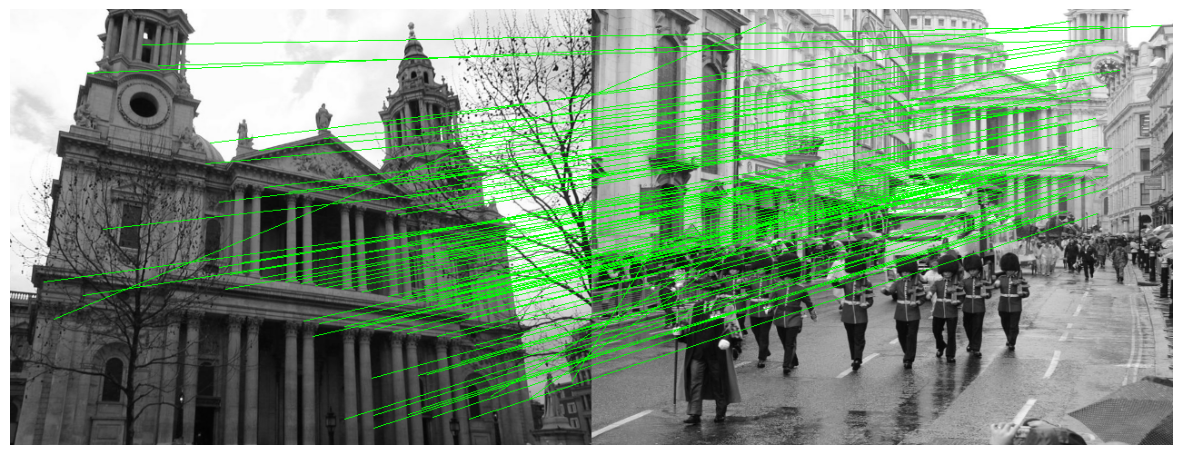

In [11]:
import matplotlib.pyplot as plt
from models.matching import Matching
import torch
import cv2
import numpy as np
from pathlib import Path

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# SuperPoint + SuperGlue config
config = {
    'superpoint': {
        'nms_radius': 4,
        'keypoint_threshold': 0.005,
        'max_keypoints': 1024,
    },
    'superglue': {
        'weights': 'outdoor',  # or 'outdoor'
    }
}
matching = Matching(config).eval().to(device)

def load_image(path):
    img = cv2.imread(str(path), cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(f'Image at {path} not found.')
    img = cv2.resize(img, (640, 480))
    return img

# Load uploaded images
img0 = load_image('st_pauls_cathedral_30776973_2635313996.jpg')
img1 = load_image('st_pauls_cathedral_37347628_10902811376.jpg')

# Prepare for matching
def preprocess(img):
    img = torch.from_numpy(img / 255.).float()[None, None].to(device)
    return {'image': img}

data = {**preprocess(img0), **{k+'0': v for k, v in preprocess(img0).items()},
        **{k+'1': v for k, v in preprocess(img1).items()}}

# Run SuperPoint + SuperGlue
with torch.no_grad():
    pred = matching(data)

# Extract results
kpts0 = pred['keypoints0'][0].cpu().numpy()
kpts1 = pred['keypoints1'][0].cpu().numpy()
matches = pred['matches0'][0].cpu().numpy()

valid = matches > -1
mkpts0 = kpts0[valid]
mkpts1 = kpts1[matches[valid]]

# Draw and visualize matches
def plot_matches(img0, img1, kpts0, kpts1):
    h, w = img0.shape
    out = cv2.hconcat([img0, img1])
    out = cv2.cvtColor(out, cv2.COLOR_GRAY2BGR)
    for pt1, pt2 in zip(kpts0, kpts1):
        pt1 = tuple(np.round(pt1).astype(int))
        pt2 = tuple(np.round(pt2).astype(int) + np.array([w, 0]))
        cv2.line(out, pt1, pt2, (0, 255, 0), 1)
    return out

out_img = plot_matches(img0, img1, mkpts0, mkpts1)
plt.figure(figsize=(15, 6))
plt.imshow(out_img[..., ::-1])
plt.axis('off')
plt.show()
